In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
%matplotlib inline

np.random.seed(sum(map(ord, "palettes")))
sns.set()
sns.set_style("darkgrid")

In [2]:
data = []
for i in range(100,4100,100):
    with open("results_"+str(i)+".json") as f:
        res = json.load(f)
        data.append(res)
        
data = dict(zip(data[0],zip(*[d.values() for d in data])))

In [3]:
data.keys()

dict_keys(['adversarial_uncertainty_incorrect', 'adversarial_uncertainty_correct', 'gen_losses', 'adversarial_classification_accuracy', 'supervised_acc', 'disc_loss', 'non_adversarial_classification_accuracy', 'adversarial_filtered_semi_supervised_acc', 'previous_chkpt', 'semi_supervised_acc', 'timestamp', 'adversarial_unfilted_semi_supervised_acc'])

[(0, 105)]

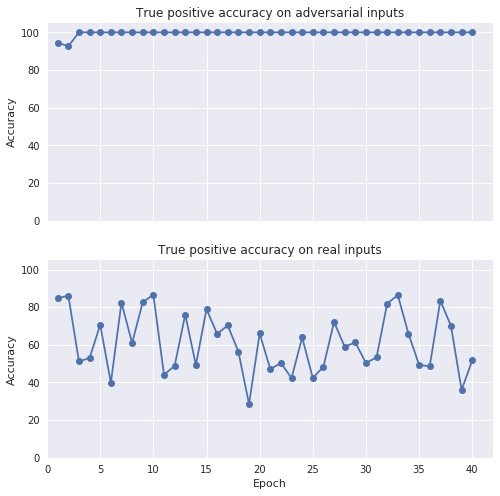

In [4]:
f, axarr = plt.subplots(2, sharex=True, figsize=(8,8))
#f.suptitle('Sharing X axis')
x = range(1,41)
axarr[0].plot(x,100*(1-np.array(data['adversarial_classification_accuracy'])), '-o')
axarr[0].set_title('True positive accuracy on adversarial inputs')
axarr[0].set(ylabel='Accuracy')
axarr[0].set(ylim=[0,105])
axarr[1].plot(x,100*(np.array(data['non_adversarial_classification_accuracy'])), '-o')
axarr[1].set_title('True positive accuracy on real inputs')
axarr[1].set(xlabel='Epoch', ylabel='Accuracy', xlim=(0,42))
axarr[1].set(ylim=[0,105])

#Classified not fake/total labelled test on adversarial input

(0, 100)

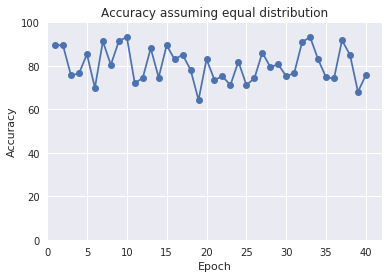

In [6]:
plt.plot(x,100*0.5*(np.array(data['non_adversarial_classification_accuracy'])+ 1-np.array(data['adversarial_classification_accuracy'])), '-o')
plt.title('Accuracy assuming equal distribution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,42])
plt.ylim([0,100])
#plt.set(ylim=[0,1.1])

(0, 100)

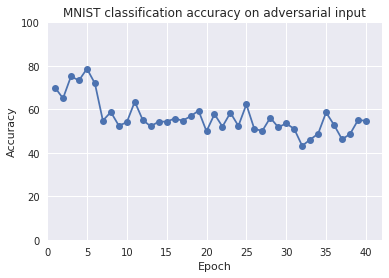

In [7]:
plt.plot(x, data['adversarial_unfilted_semi_supervised_acc'], '-o')
plt.title('MNIST classification accuracy on adversarial input')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,42])
plt.ylim([0,100])

In [8]:
np.max(data['semi_supervised_acc'])

97.787700426222855

Text(0.5,0,'Epoch')

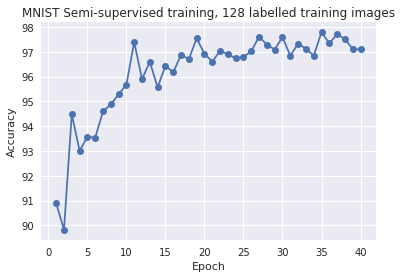

In [9]:
x = range(1,41)
plt.plot(x, data['semi_supervised_acc'],'o-')
plt.title('MNIST Semi-supervised training, 128 labelled training images')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

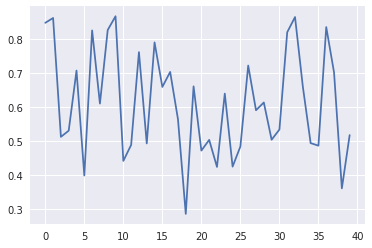

In [10]:
plt.plot(data['non_adversarial_classification_accuracy']) #Classified not fake/total labelled test on non-adversarial input

In [11]:
avg_losses = np.array([np.mean(x) for x in data['gen_losses']])

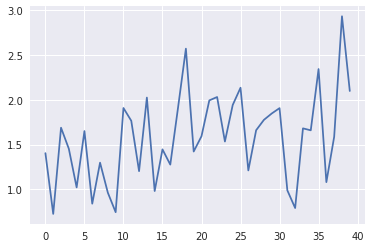

In [12]:
plt.plot(avg_losses)

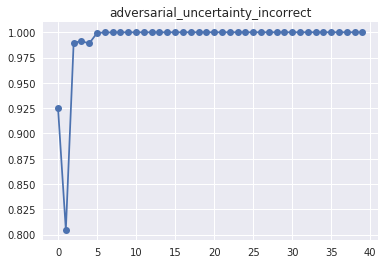

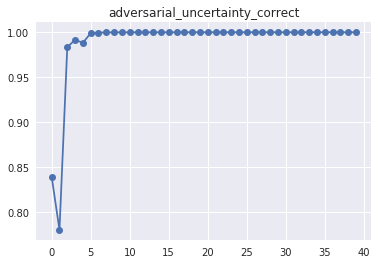

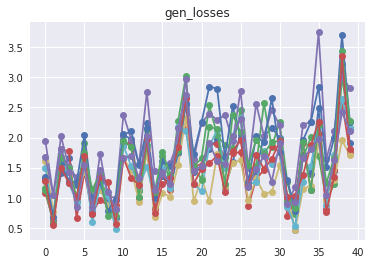

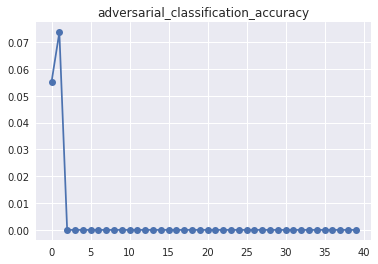

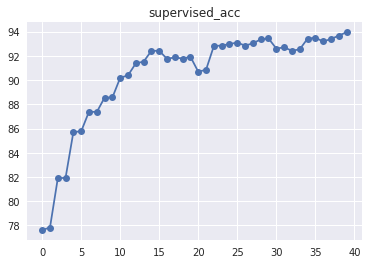

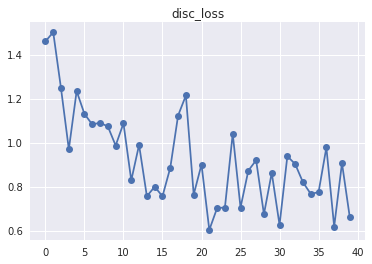

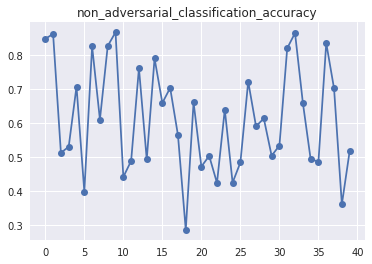

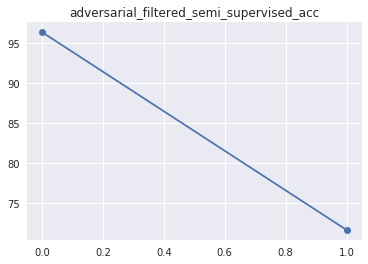

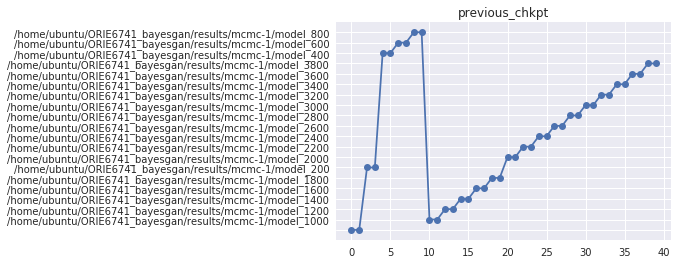

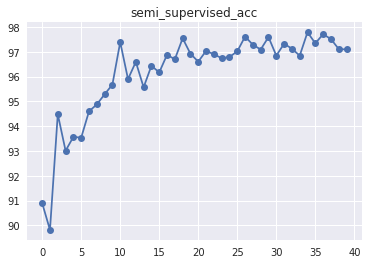

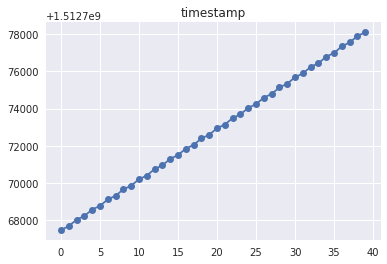

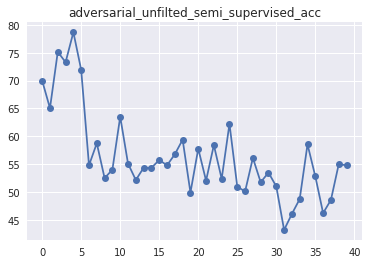

In [13]:
for k in data.keys():
    plt.figure()
    plt.plot(data[k],'o-')
    plt.title(k)
    plt.show